In [59]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import graphviz
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import tree

In [4]:
df = pd.read_csv('threats.csv')

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,Threat
0,-0.01,-0.43,2.22,-0.59,0.80,0.21,-0.19,0.30,-0.25,0.42,...,-0.07,0.30,-0.19,0.61,-0.04,0.36,-0.18,-0.24,0.07,0
1,0.00,-4.11,1.48,0.92,-7.37,0.60,0.37,1.95,0.19,0.85,...,-0.57,-0.27,1.17,-0.52,-1.43,-0.24,-0.41,0.71,-0.22,0
2,0.01,-5.03,-2.78,-0.83,0.92,0.46,0.10,1.36,-0.74,1.62,...,-0.13,0.33,0.38,0.41,-0.61,0.24,-0.10,-1.19,0.37,0
3,-0.02,1.98,2.30,0.87,-7.09,0.36,0.16,1.79,0.23,0.26,...,0.07,0.41,-0.81,-0.49,0.07,-0.20,-0.31,-0.55,0.18,0
4,-0.01,0.14,-2.43,-0.68,0.73,-1.47,0.68,1.93,-0.35,3.12,...,-0.04,0.03,0.07,-0.05,-0.02,-0.01,0.00,-0.20,0.07,0


In [6]:
X = df.drop('Threat', axis=1)
y = df['Threat']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
566853,-0.02,1.40,2.45,0.94,-7.18,0.41,0.08,1.68,0.27,0.16,...,1.21,-0.11,-0.41,-0.22,-0.92,0.12,-0.75,-0.31,0.01,0.00
382311,-0.02,2.17,2.71,-0.12,-1.04,-0.04,0.11,0.04,0.61,-0.03,...,0.38,-0.34,-0.58,0.76,0.25,-0.04,0.08,-1.25,0.18,-0.04
241519,-0.01,0.70,-2.06,-0.88,1.06,0.23,-1.00,0.81,-0.43,0.84,...,0.08,-0.16,1.21,0.40,-0.15,-2.43,-0.18,-0.05,1.24,-0.36
719220,-0.01,0.54,2.45,-0.54,0.80,0.21,-0.18,-0.08,-0.13,-0.31,...,0.12,-0.28,-0.79,1.35,-0.22,0.11,-1.38,-0.22,-0.69,0.20
905718,0.00,-1.83,-1.72,-0.63,0.73,0.47,-1.24,-1.24,0.22,-3.11,...,4.42,0.68,-0.88,-1.85,3.08,-0.04,-1.02,-0.10,-0.23,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,-0.01,1.12,-1.65,-0.81,1.05,0.20,-1.24,0.47,-0.31,0.16,...,0.71,-0.04,0.98,0.06,-1.06,-0.10,-0.83,-0.03,-0.05,0.02
365838,0.02,-6.66,-0.37,12.78,1.62,1.27,-0.02,0.37,0.12,1.50,...,1.05,1.68,-0.76,1.03,-0.30,-0.51,-0.50,0.05,0.37,-0.04
131932,-0.02,2.02,-3.78,-0.14,-0.69,2.64,2.36,-0.85,-0.23,-0.76,...,-0.67,-0.05,0.34,0.04,0.09,-0.06,0.04,0.14,0.69,-0.19
671155,-0.02,2.14,2.72,-0.13,-1.03,-0.01,0.19,0.00,0.63,-0.06,...,0.72,-0.07,-0.07,-0.35,-0.98,0.10,-0.79,-1.24,0.35,-0.10


In [73]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [74]:
y_pred = clf.predict(X_test)
y_pred = list(y_pred)
y_test = list(y_test)
correct = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        correct += 1
        
accuracy = (correct/len(y_pred))*100
accuracy

99.57350000000001

In [75]:
f1_score(y_test, y_pred, average='macro')

0.5001010566518682

In [76]:
f1_score(y_test, y_pred, average='micro')

0.995735

In [77]:
f1_score(y_test, y_pred, average='weighted')

0.9959813921283059

In [78]:
roc_auc_score(y_test, y_pred)

0.5001304979639031

In [79]:
matthews_corrcoef(y_test, y_pred)

0.0002323957384001944

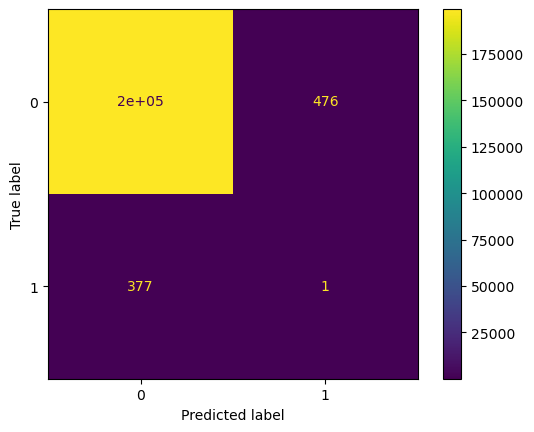

In [80]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

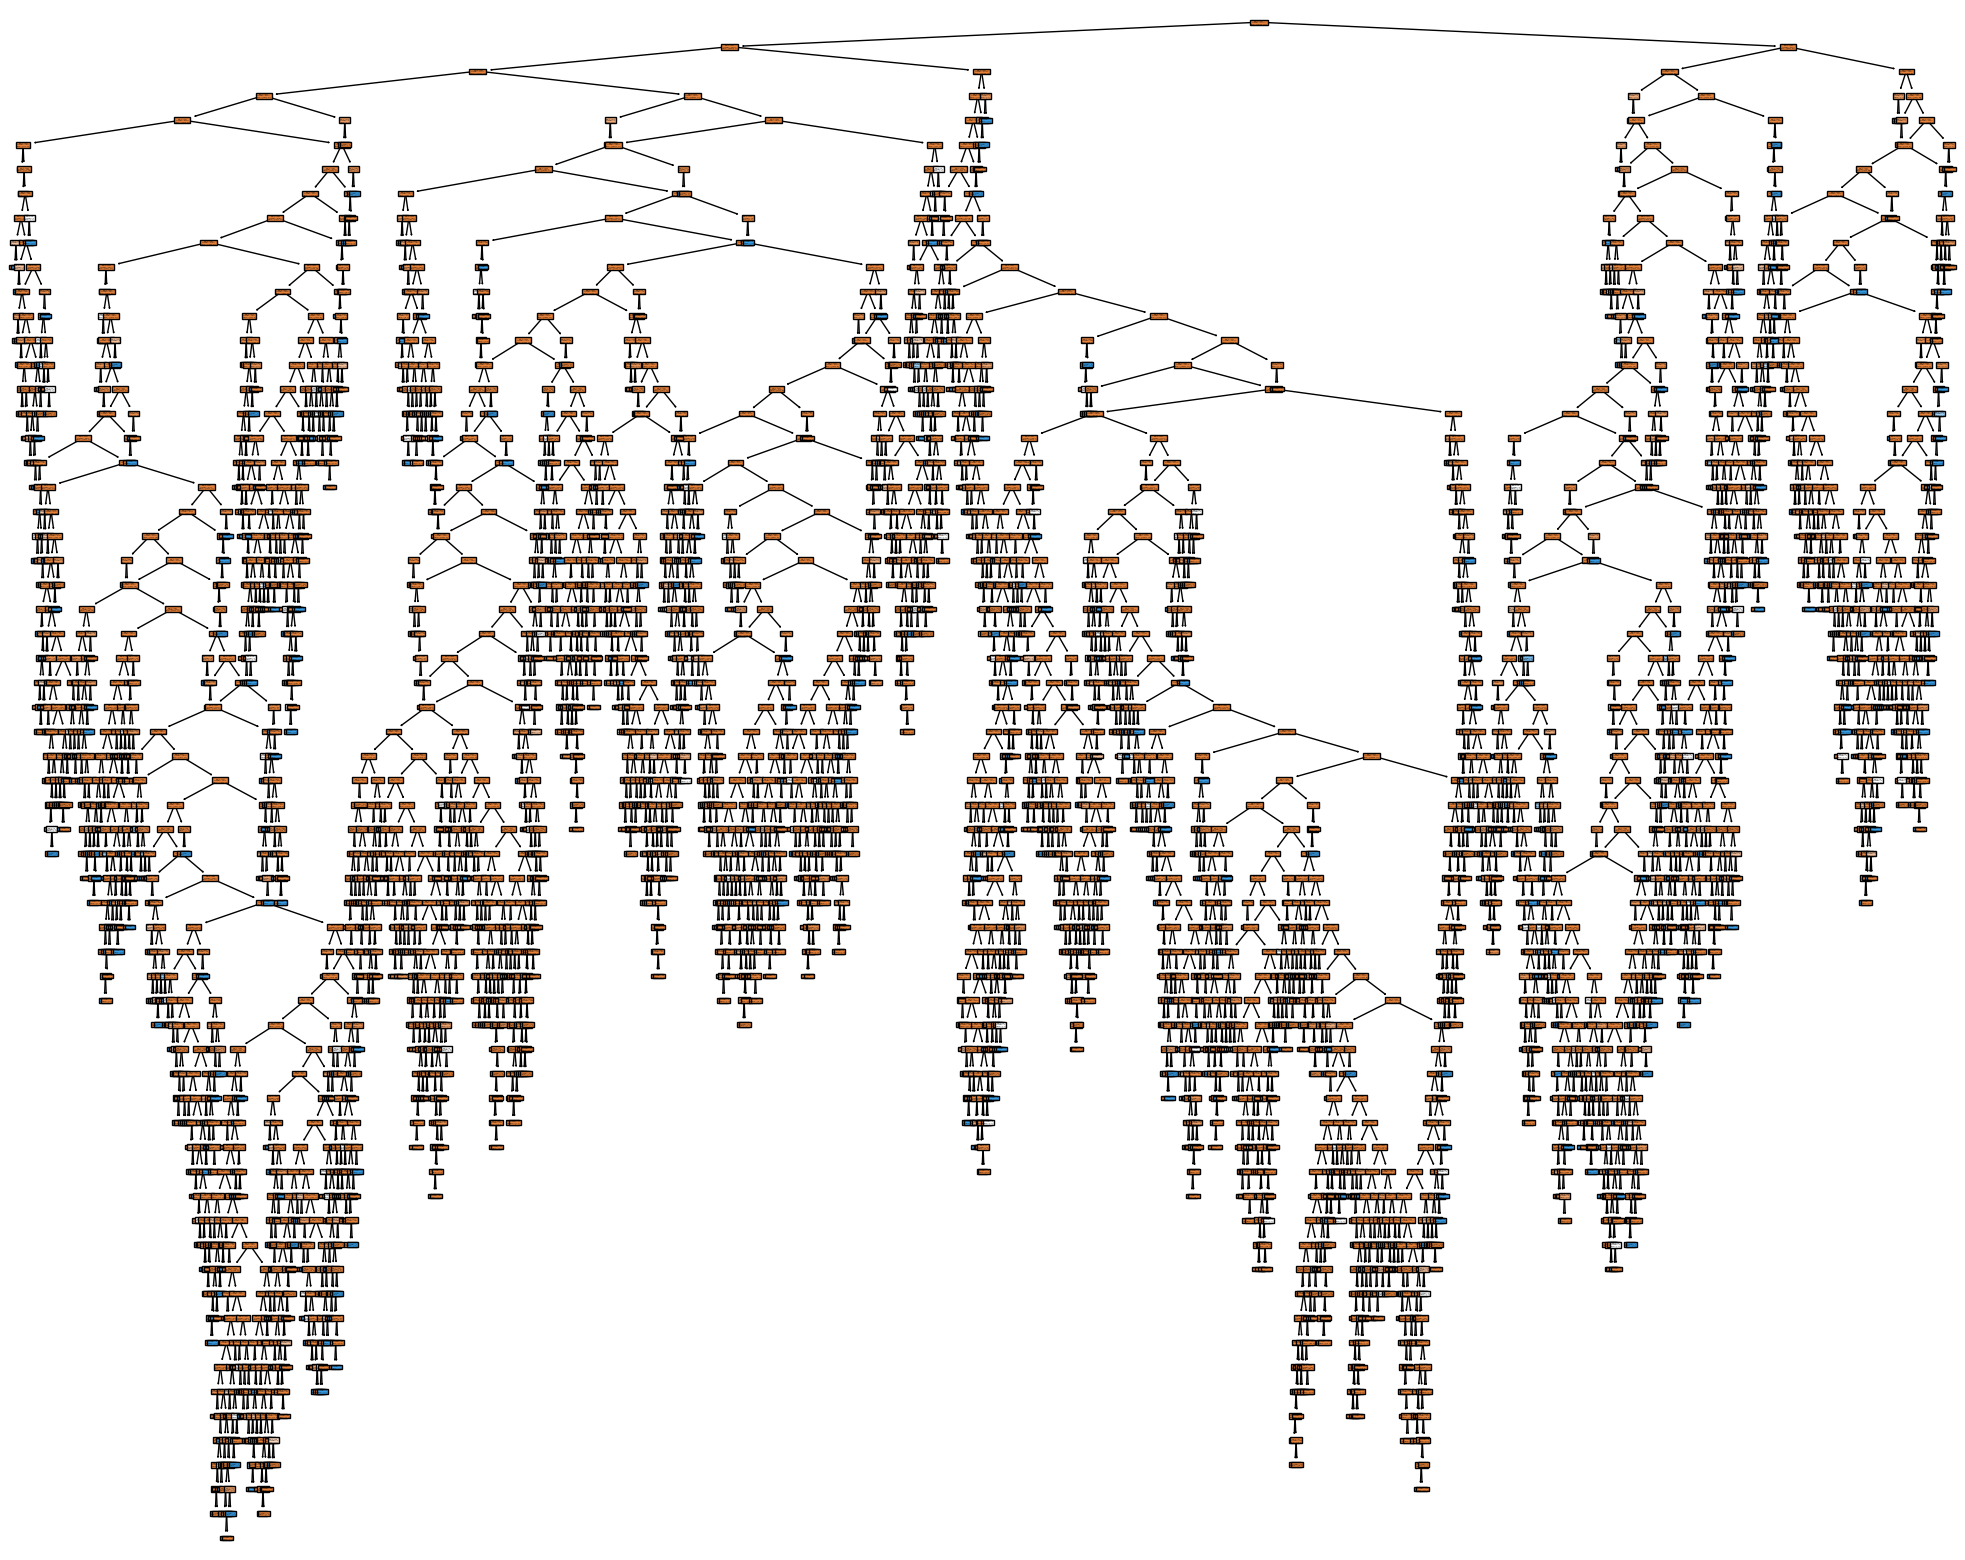

In [27]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=list(X_train.columns),  
                   #class_names=iris.target_names,
                   filled=True)